In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy.io import loadmat

In [2]:
import os
for i in os.listdir():
    if 'mat' in i:
        print(i)

bird_small.mat
ex7data1.mat
ex7data2.mat
ex7faces.mat


In [3]:
X = loadmat('ex7data2.mat')['X']

In [4]:
X.shape

(300, 2)

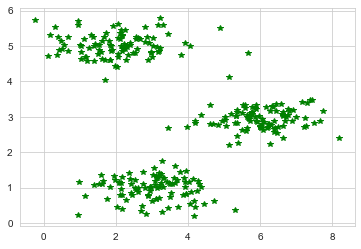

In [5]:
plt.plot(X[:,0], X[:,1], 'g*', ms=6);

In [6]:
pd.DataFrame(X).describe()

,0,1
count,300.000000,300.000000
mean,3.684376,2.987101
std,1.925578,1.685078
min,-0.245127,0.205810
25%,2.156202,1.210797
50%,3.231561,2.949738
75%,5.509490,4.807780
max,8.203398,5.784297


# K-Means Clustering Algorithm

In [8]:
def closest_centroid(x,centroid):

    m = x.shape[0]
    K = centroid.shape[0]
    
    C_values = np.zeros((x.shape[0],1))
    min_J = np.zeros((centroid.shape[0],1))

    
    for i in range(m):
        for j in range(K):
            min_J[j] = np.sqrt(np.sum((x[i,:] - centroid[j])**2))
        C_values[i] = np.argmin(min_J)+1
    
    return C_values

In [9]:
# below function gets the centroid for a specific K value given
def get_new_centroid(x,cluster, num): 
    all_values = []
    
    for j, c in enumerate(cluster):
        if c==num:
            all_values.append(x[j])
    
    return (np.sum(all_values,axis=0)) / len(all_values), all_values

# this function will plot the above classified cluster

def plot_cluster(k, x,cluster,title):
    
    for i in range(k):
        vals_ = np.array(get_new_centroid(x,cluster,i+1)[1])
        plt.scatter(vals_[:,0], vals_[:,1])
    plt.title(title)
    plt.show()

    
# below function combines the new controid for every k value given by the above function and combines it into a list
def centroids_updated(k,x, cluster):
    updated_centroids = np.zeros((k, x.shape[1]))
    
    for i in range(1,k+1):
        updated_centroids[i-1:,] = get_new_centroid(x,cluster, num=i)[0]
    
    return updated_centroids


In [10]:
centroids = np.array([[3,3], [6,2], [8,5]])

In [11]:
cluster_ = closest_centroid(X,centroids)

In [12]:
print('Closest centroid for first three examples:\n{}'.format(cluster_[:3]))

Closest centroid for first three examples:
[[1.]
 [3.]
 [2.]]


In [13]:
K=3

for i in range(100):
    cluster_ = closest_centroid(X,centroids)
    centroids = centroids_updated(K,X,cluster_)
    
    

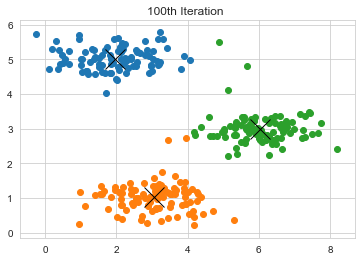

In [14]:
plt.plot(centroids[:,0], centroids[:,1], 'kx', ms=20)
plot_cluster(K,X,cluster_,'100th Iteration ')


# Random Initialization

In [15]:
def Random_Initialization(x,k):
    m = x.shape[0]
    
    ind_ = np.random.choice(m,k)
    return x[ind_,:]

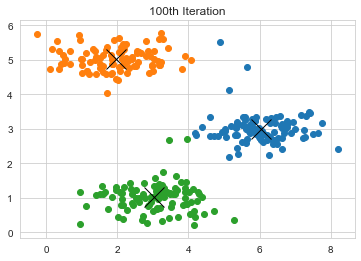

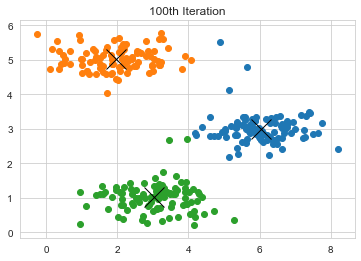

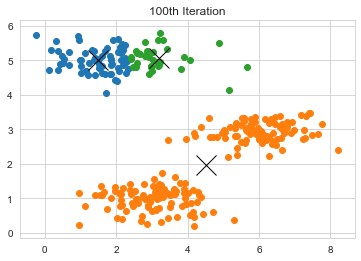

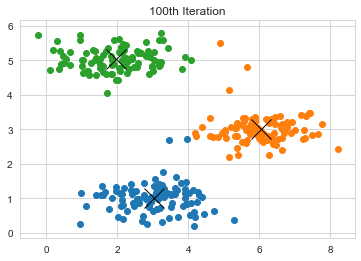

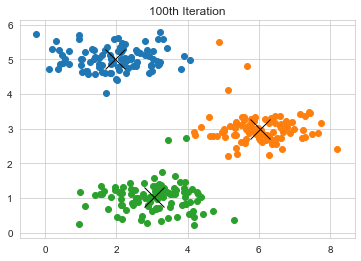

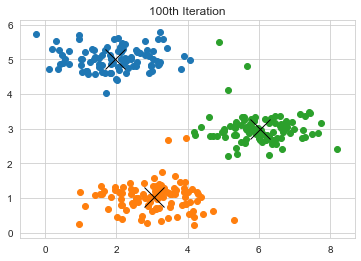

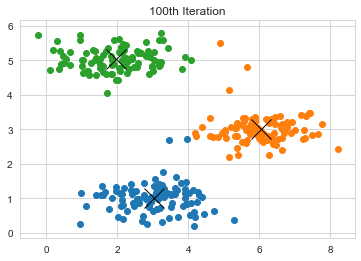

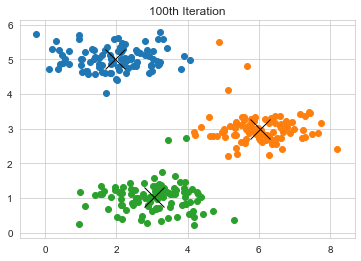

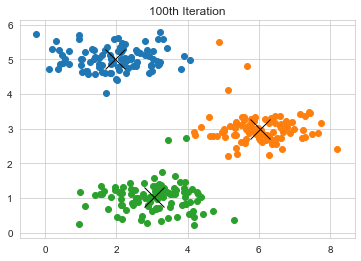

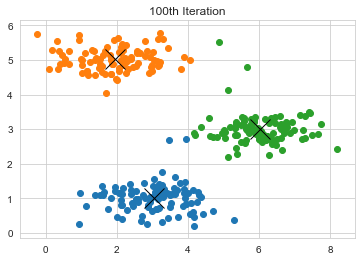

In [16]:
# different clusters formed as initial centroids are varied

for i in range(10):
    centroids = Random_Initialization(X,K)
    
    for j in range(100):
        cluster_ = closest_centroid(X,centroids)
        centroids = centroids_updated(K,X,cluster_)

    plt.plot(centroids[:,0], centroids[:,1], 'kx', ms=20)
    plot_cluster(K,X,cluster_,'100th Iteration')

# Image Compression with K-means

In [17]:
', '.join(os.listdir())

'.ipynb_checkpoints, bird_small.mat, bird_small.png, computeCentroids.m, displayData.m, drawLine.m, ex7.m, ex7data1.mat, ex7data2.mat, ex7faces.mat, ex7_pca.m, featureNormalize.m, findClosestCentroids.m, K-Means Clustering.ipynb, kMeansInitCentroids.m, lib, pca.m, plotDataPoints.m, plotProgresskMeans.m, projectData.m, recoverData.m, runkMeans.m, submit.m'

In [18]:
img_ = plt.imread('bird_small.png')

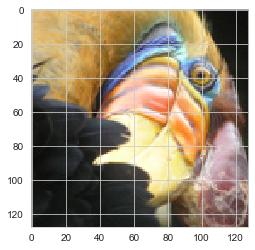

In [19]:
plt.imshow(img_)

In [20]:
img_ = img_.reshape(img_.shape[0] * img_.shape[1], img_.shape[2])

In [21]:
img_ = img_/255

In [22]:
img_

array([[0.00336794, 0.00276817, 0.00158401],
       [0.0035371 , 0.00284506, 0.00178393],
       [0.00347559, 0.00286044, 0.00169166],
       ...,
       [0.00099962, 0.00066128, 0.00059977],
       [0.00089196, 0.00056901, 0.00058439],
       [0.00079969, 0.00059977, 0.00052288]], dtype=float32)

In [23]:
# Run k-means on this data, forming 16 clusters, with random initialization
# centroid = K * n


K = 16
iter_ = 10


centroid_ = Random_Initialization(img_, K)

for i in range(iter_):
    
    idx = closest_centroid(img_, centroid_)
    centroid_ = centroids_updated(K, img_, idx)



In [24]:
dup_img = img_.copy()

In [25]:
# replacing all the values in orignal image to the centroids obtained according to the cluster assigned

m = idx.shape[0]

for i in range(m):
    dup_img[i] = centroid_[int(idx[i])-1]
        

In [26]:
dup_img

array([[0.00334697, 0.00270053, 0.00165611],
       [0.00334697, 0.00270053, 0.00165611],
       [0.00334697, 0.00270053, 0.00165611],
       ...,
       [0.00120504, 0.00087143, 0.00066343],
       [0.00057628, 0.00059878, 0.00056443],
       [0.00057628, 0.00059878, 0.00056443]], dtype=float32)

In [27]:
dup_img = dup_img.reshape(128,128,3) 

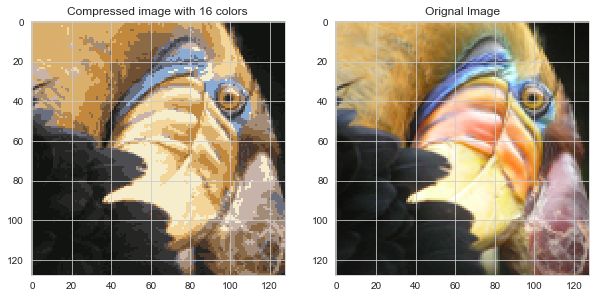

In [28]:
figure,axes = plt.subplots(1,2,figsize=(10,6))

axes[0].imshow(dup_img*255)
axes[0].set_title('Compressed image with 16 colors')

axes[1].imshow(img_.reshape(128,128,3) * 255)
axes[1].set_title('Orignal Image');

# Compressing the Image with 6 colors

In [29]:
K = 5
iter_ = 10


centroid_ = Random_Initialization(img_, K)

for i in range(iter_):
    
    idx = closest_centroid(img_, centroid_)
    centroid_ = centroids_updated(K, img_, idx)
    

In [30]:
dup_img = img_.copy()

In [31]:
m = idx.shape[0]

for i in range(m):
    dup_img[i] = centroid_[int(idx[i])-1]

In [32]:
dup_img = dup_img.reshape(128,128,3) 

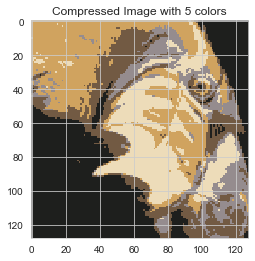

In [33]:
plt.imshow(dup_img*255)
plt.title('Compressed Image with 5 colors');